<a href="https://colab.research.google.com/github/MohammadPashaee/AI-Super-Course/blob/main/Assignments/S1/S1A6/S1A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/possum.csv")

In [ ]:
df.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [ ]:
v = df["Pop"][0]

for i in range(104):
  if df["Pop"][i] == v:
    df["Pop"][i] = 1
  else:
    df["Pop"][i] = 0

<ipython-input-41-248ef5de93fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pop"][i] = 1
<ipython-input-41-248ef5de93fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pop"][i] = 0


In [ ]:
s = df["sex"][0]

for i in range(104):
  if df["sex"][i] == s:
    df["sex"][i] = 1
  else:
    df["sex"][i] = 0

<ipython-input-42-a7e76804f6dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"][i] = 1
<ipython-input-42-a7e76804f6dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"][i] = 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
df_nans_dropped = df.dropna()

print(df_nans_dropped.shape)
df_nans_dropped.info()

(101, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [ ]:
df_x = df_nans_dropped.drop(labels=["case", "sex"], axis=1)
df_y = df_nans_dropped[["sex"]].copy()

print(df_x.shape, df_y.shape)

(101, 12) (101, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_nrm = scaler.fit_transform(df_x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_nrm, df_y.values.reshape((-1, )), train_size=0.8)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(80, 12) (21, 12) (80,) (21,)


In [ ]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=x_train.shape[1:]))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, 'sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
 model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                416       
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.fit(x_train, y_train, epochs=32, validation_data=(x_test, y_test))

Epoch 1/32
3/3 [==============================] - 1s 123ms/step - loss: 0.6733 - val_loss: 0.6767
Epoch 2/32
3/3 [==============================] - 0s 24ms/step - loss: 0.6630 - val_loss: 0.6747
Epoch 3/32
3/3 [==============================] - 0s 17ms/step - loss: 0.6536 - val_loss: 0.6739
Epoch 4/32
3/3 [==============================] - 0s 19ms/step - loss: 0.6450 - val_loss: 0.6721
Epoch 5/32
3/3 [==============================] - 0s 19ms/step - loss: 0.6373 - val_loss: 0.6706
Epoch 6/32
3/3 [==============================] - 0s 18ms/step - loss: 0.6294 - val_loss: 0.6702
Epoch 7/32
3/3 [==============================] - 0s 19ms/step - loss: 0.6218 - val_loss: 0.6698
Epoch 8/32
3/3 [==============================] - 0s 19ms/step - loss: 0.6138 - val_loss: 0.6702
Epoch 9/32
3/3 [==============================] - 0s 22ms/step - loss: 0.6058 - val_loss: 0.6715
Epoch 10/32
3/3 [==============================] - 0s 21ms/step - loss: 0.5980 - val_loss: 0.6731
Epoch 11/32
3/3 [===========

In [ ]:
yhat_test = model.predict(x_test).round()

1/1 [==============================] - 0s 96ms/step


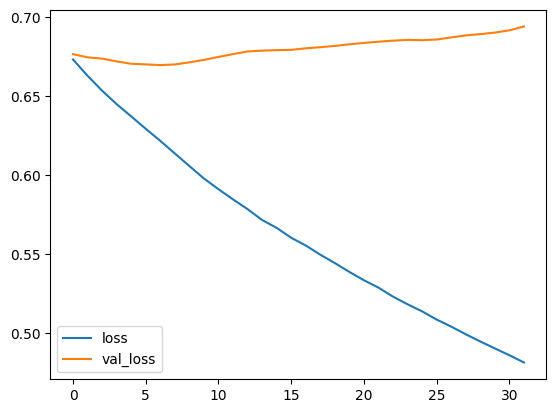

In [ ]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")

plt.legend()

In [ ]:
model1 = Sequential()

model1.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))

model1.add(Dense(16, activation='relu'))

model1.add(Dense(1, 'sigmoid'))

In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
 model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                832       
                                                                 
 dense_13 (Dense)            (None, 16)                1040      
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results1 = model1.fit(x_train, y_train, epochs=32, validation_data=(x_test, y_test))

Epoch 1/32
3/3 [==============================] - 1s 88ms/step - loss: 0.6595 - val_loss: 0.6420
Epoch 2/32
3/3 [==============================] - 0s 17ms/step - loss: 0.6353 - val_loss: 0.6523
Epoch 3/32
3/3 [==============================] - 0s 23ms/step - loss: 0.6213 - val_loss: 0.6658
Epoch 4/32
3/3 [==============================] - 0s 18ms/step - loss: 0.6073 - val_loss: 0.6794
Epoch 5/32
3/3 [==============================] - 0s 18ms/step - loss: 0.5956 - val_loss: 0.6907
Epoch 6/32
3/3 [==============================] - 0s 17ms/step - loss: 0.5849 - val_loss: 0.7002
Epoch 7/32
3/3 [==============================] - 0s 18ms/step - loss: 0.5757 - val_loss: 0.7053
Epoch 8/32
3/3 [==============================] - 0s 18ms/step - loss: 0.5667 - val_loss: 0.7074
Epoch 9/32
3/3 [==============================] - 0s 21ms/step - loss: 0.5577 - val_loss: 0.7090
Epoch 10/32
3/3 [==============================] - 0s 17ms/step - loss: 0.5490 - val_loss: 0.7094
Epoch 11/32
3/3 [============

In [ ]:
yhat_test1 = model1.predict(x_test).round()

1/1 [==============================] - 0s 165ms/step


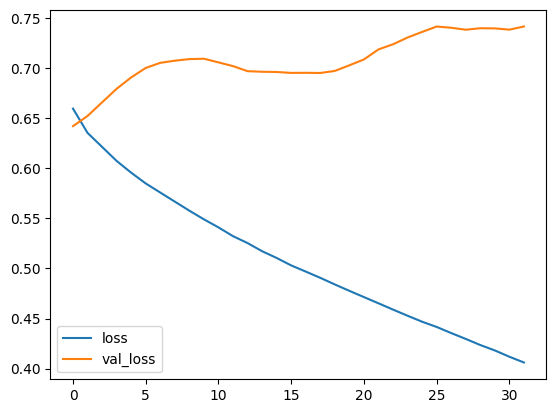

In [ ]:
plt.plot(results1.history["loss"], label="loss")
plt.plot(results1.history["val_loss"], label="val_loss")

plt.legend()

In [ ]:
model2 = Sequential()

model2.add(Dense(64, activation='tanh', input_shape=x_train.shape[1:]))

model2.add(Dense(32, activation='relu'))

model2.add(Dense(16, activation='relu'))

model2.add(Dense(1, 'sigmoid'))

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
 model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                832       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results2 = model1.fit(x_train, y_train, epochs=32, validation_data=(x_test, y_test))

Epoch 1/32
3/3 [==============================] - 0s 49ms/step - loss: 0.4001 - val_loss: 0.7434
Epoch 2/32
3/3 [==============================] - 0s 21ms/step - loss: 0.3950 - val_loss: 0.7434
Epoch 3/32
3/3 [==============================] - 0s 19ms/step - loss: 0.3896 - val_loss: 0.7454
Epoch 4/32
3/3 [==============================] - 0s 18ms/step - loss: 0.3846 - val_loss: 0.7484
Epoch 5/32
3/3 [==============================] - 0s 19ms/step - loss: 0.3789 - val_loss: 0.7563
Epoch 6/32
3/3 [==============================] - 0s 18ms/step - loss: 0.3747 - val_loss: 0.7642
Epoch 7/32
3/3 [==============================] - 0s 19ms/step - loss: 0.3686 - val_loss: 0.7643
Epoch 8/32
3/3 [==============================] - 0s 17ms/step - loss: 0.3639 - val_loss: 0.7676
Epoch 9/32
3/3 [==============================] - 0s 17ms/step - loss: 0.3591 - val_loss: 0.7706
Epoch 10/32
3/3 [==============================] - 0s 18ms/step - loss: 0.3549 - val_loss: 0.7744
Epoch 11/32
3/3 [============

In [ ]:
yhat_test2 = model1.predict(x_test).round()

1/1 [==============================] - 0s 116ms/step


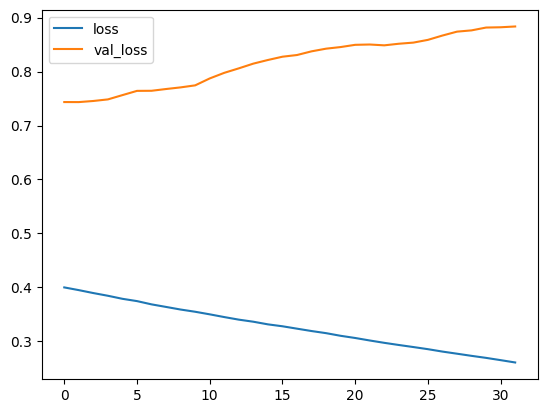

In [ ]:
plt.plot(results2.history["loss"], label="loss")
plt.plot(results2.history["val_loss"], label="val_loss")

plt.legend()